<a href="https://colab.research.google.com/github/Amidujalloh/Jalloh/blob/main/Actual_Prediction_Future_Flood_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Read the CSV Dataset
df = pd.read_csv('/content/drive/MyDrive/Flood_System/Nwe_sle-rainfall-adm2-5ytd.csv',index_col='date',parse_dates=True)
#df.index.freq='MS' #Meaning Monthly Data

In [5]:
#Show the first five rows
df.head()


,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
date,,,,,,,,,,,,,
2020-01-01,1006463,SL0402,3,2.0000,2.1778,6.6667,14.2222,293.0000,313.0778,97.5232,68.8073,93.7855,final
2020-01-11,1006463,SL0402,3,1.0000,1.2778,5.6667,8.8667,230.0000,215.6444,95.5752,83.0389,106.3620,final
2020-01-21,1006463,SL0402,3,2.0000,1.2667,5.0000,4.7222,119.6667,136.9444,111.7021,101.8868,88.2420,final
2020-02-01,1006463,SL0402,3,1.3333,1.6444,4.3333,4.1889,61.6667,93.6222,95.3177,101.0180,69.1615,final
2020-02-11,1006463,SL0402,3,1.3333,1.8778,4.6667,4.7889,19.3333,58.2000,92.0840,99.1736,43.0108,final


In [6]:
df['r3h'] = pd.to_numeric(df['r3h'], errors='coerce')

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

In [8]:
df['r3h'].head()

date
2020-01-01    293.0000
2020-01-11    230.0000
2020-01-21    119.6667
2020-02-01     61.6667
2020-02-11     19.3333
Name: r3h, dtype: float64

In [9]:
df.index.dtype

dtype('<M8[ns]')

<Axes: xlabel='date'>

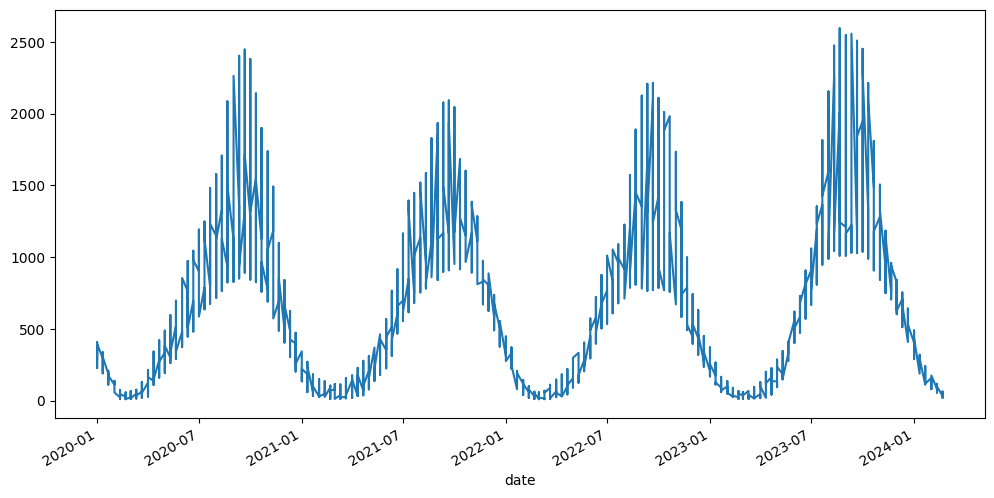

In [10]:
df['r3h'].plot(figsize=(12, 6))

on the graph there is some kind of repeating patterns and there is an increase over time.

In [11]:
results = seasonal_decompose(df['r3h'], period=12)

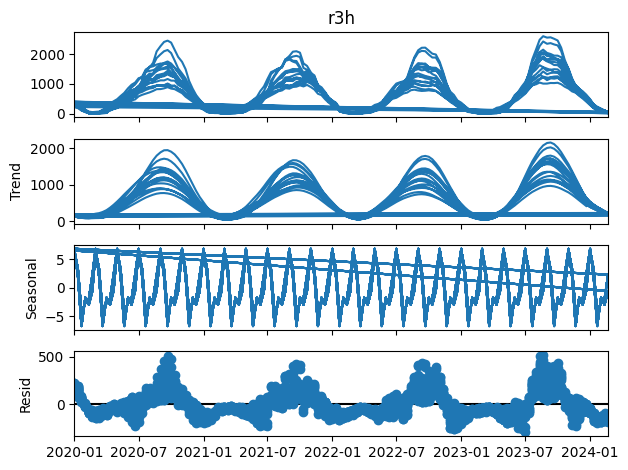

In [12]:
results.plot();

In [13]:
#get the total number of data
len(df)

2400

In [14]:
train = df.iloc[:1680]
test = df.iloc[720:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
df.head(),df.tail()

(            adm2_id ADM2_PCODE  n_pixels     rfh  rfh_avg     r1h  r1h_avg  \
 date                                                                         
 2020-01-01  1006463     SL0402         3  2.0000   2.1778  6.6667  14.2222   
 2020-01-11  1006463     SL0402         3  1.0000   1.2778  5.6667   8.8667   
 2020-01-21  1006463     SL0402         3  2.0000   1.2667  5.0000   4.7222   
 2020-02-01  1006463     SL0402         3  1.3333   1.6444  4.3333   4.1889   
 2020-02-11  1006463     SL0402         3  1.3333   1.8778  4.6667   4.7889   
 
                  r3h   r3h_avg       rfq       r1q       r3q version  
 date                                                                  
 2020-01-01  293.0000  313.0778   97.5232   68.8073   93.7855   final  
 2020-01-11  230.0000  215.6444   95.5752   83.0389  106.3620   final  
 2020-01-21  119.6667  136.9444  111.7021  101.8868   88.2420   final  
 2020-02-01   61.6667   93.6222   95.3177  101.0180   69.1615   final  
 2020-02-11  

In [17]:
for col in train.columns:
    if train[col].dtype == "object":
        print(col, train[col].unique())

ADM2_PCODE ['SL0402' 'SL0401' 'SL0205' 'SL0304' 'SL0204' 'SL0303' 'SL0102' 'SL0203'
 'SL0201' 'SL0202' 'SL0101' 'SL0302']
version ['final' 'prelim']


In [18]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1680 entries, 2020-01-01 to 2020-10-21
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   adm2_id     1680 non-null   int64  
 1   ADM2_PCODE  1680 non-null   object 
 2   n_pixels    1680 non-null   int64  
 3   rfh         1680 non-null   float64
 4   rfh_avg     1680 non-null   float64
 5   r1h         1680 non-null   float64
 6   r1h_avg     1680 non-null   float64
 7   r3h         1680 non-null   float64
 8   r3h_avg     1680 non-null   float64
 9   rfq         1680 non-null   float64
 10  r1q         1680 non-null   float64
 11  r3q         1680 non-null   float64
 12  version     1680 non-null   object 
dtypes: float64(9), int64(2), object(2)
memory usage: 183.8+ KB


,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
date,,,,,,,,,,,,,
2020-01-01,1006463,SL0402,3,2.0000,2.1778,6.6667,14.2222,293.0000,313.0778,97.5232,68.8073,93.7855,final
2020-01-11,1006463,SL0402,3,1.0000,1.2778,5.6667,8.8667,230.0000,215.6444,95.5752,83.0389,106.3620,final
2020-01-21,1006463,SL0402,3,2.0000,1.2667,5.0000,4.7222,119.6667,136.9444,111.7021,101.8868,88.2420,final
2020-02-01,1006463,SL0402,3,1.3333,1.6444,4.3333,4.1889,61.6667,93.6222,95.3177,101.0180,69.1615,final
2020-02-11,1006463,SL0402,3,1.3333,1.8778,4.6667,4.7889,19.3333,58.2000,92.0840,99.1736,43.0108,final


In [19]:
# Fit the scaler to the 'r3h' column of the training data
scaler.fit(train[['r3h']])

# Transform the 'r3h' column of both training and testing datasets
scaled_train = scaler.transform(train[['r3h']])
scaled_test = scaler.transform(test[['r3h']])

# Optionally, convert scaled data back to DataFrames, retaining the date index
scaled_train_df = pd.DataFrame(scaled_train, columns=['r3h'], index=train.index)
scaled_test_df = pd.DataFrame(scaled_test, columns=['r3h'], index=test.index)

In [20]:
scaled_train[:10]

array([[0.1098417 ],
       [0.08548381],
       [0.0428253 ],
       [0.02040058],
       [0.00403309],
       [0.00338872],
       [0.00429085],
       [0.00609516],
       [0.00751278],
       [0.01021922]])

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
# define generator  we produce batches of there to generate the next input
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


Shows the testing of how the model going to handle the data

In [23]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.1098417  0.08548381 0.0428253 ]
Predict this y: 
 [[0.02040058]]


In [24]:
X.shape

(1, 3, 1)

In [25]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [26]:
#Calling the LSTM Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [27]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
model.summary() #Model Achetecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
1668/1668 [==============================] - 41s 22ms/step - loss: 0.0057
Epoch 2/50
1668/1668 [==============================] - 26s 16ms/step - loss: 0.0013
Epoch 3/50
1668/1668 [==============================] - 27s 16ms/step - loss: 0.0011
Epoch 4/50
1668/1668 [==============================] - 30s 18ms/step - loss: 9.4918e-04
Epoch 5/50
1668/1668 [==============================] - 26s 16ms/step - loss: 8.0446e-04
Epoch 6/50
1668/1668 [==============================] - 26s 16ms/step - loss: 7.2875e-04
Epoch 7/50
1668/1668 [==============================] - 26s 16ms/step - loss: 6.8564e-04
Epoch 8/50
1668/1668 [==============================] - 26s 16ms/step - loss: 6.5520e-04
Epoch 9/50
1668/1668 [==============================] - 26s 16ms/step - loss: 6.5272e-04
Epoch 10/50
1668/1668 [==============================] - 27s 16ms/step - loss: 6.5336e-04
Epoch 11/50
1668/1668 [==============================] - 26s 16ms/step - loss: 6.2423e-04
Epoch 12/50
1668/1668 [========

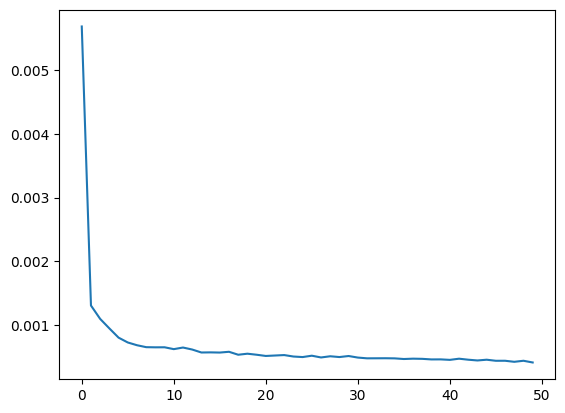

In [30]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [31]:
#Using the last 12 months to make a prediction
last_train_batch = scaled_train[-12:]

In [32]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [33]:
#Show the first Value of the testing set
model.predict(last_train_batch)

1/1 [==============================] - 0s 172ms/step


array([[0.38782448]], dtype=float32)

In [34]:
scaled_test[0] #Show the actual Value

array([0.04449065])

In [35]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [36]:
test_predictions

[array([0.38782448], dtype=float32),
 array([0.33479965], dtype=float32),
 array([0.2841304], dtype=float32),
 array([0.2345403], dtype=float32),
 array([0.18382803], dtype=float32),
 array([0.1380099], dtype=float32),
 array([0.097444], dtype=float32),
 array([0.0644141], dtype=float32),
 array([0.0428536], dtype=float32),
 array([0.03255513], dtype=float32),
 array([0.04335932], dtype=float32),
 array([0.04404804], dtype=float32),
 array([0.03473317], dtype=float32),
 array([0.02911566], dtype=float32),
 array([0.03172366], dtype=float32),
 array([0.03808209], dtype=float32),
 array([0.04959545], dtype=float32),
 array([0.07262883], dtype=float32),
 array([0.11252699], dtype=float32),
 array([0.16358453], dtype=float32),
 array([0.22275658], dtype=float32),
 array([0.2863658], dtype=float32),
 array([0.36121345], dtype=float32),
 array([0.4487089], dtype=float32),
 array([0.55331755], dtype=float32),
 array([0.66574043], dtype=float32),
 array([0.7689777], dtype=float32),
 array([0.8

In [37]:
test.head()

,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
date,,,,,,,,,,,,,
2023-05-01,1006459,SL0204,154,57.0130,41.8279,98.1299,82.4699,123.9740,117.4684,132.4274,116.9352,105.1037,final
2023-05-11,1006459,SL0204,154,66.6039,50.0814,154.6169,116.3848,189.2468,165.6067,129.9965,130.2505,113.4619,final
2023-05-21,1006459,SL0204,154,149.3766,69.5273,272.9935,161.4366,337.1429,233.2771,207.1411,165.0718,142.6944,final
2023-06-01,1006459,SL0204,154,228.2662,111.3894,444.2468,230.9981,558.9740,339.4290,200.4188,188.4857,162.8297,final
2023-06-11,1006459,SL0204,154,125.5714,105.5621,503.2143,286.4788,680.5779,439.7297,118.0978,173.1032,153.5540,final


In [38]:
true_predictions = scaler.inverse_transform(test_predictions)

In [42]:
test['Predictions'] = true_predictions

<ipython-input-42-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='date'>

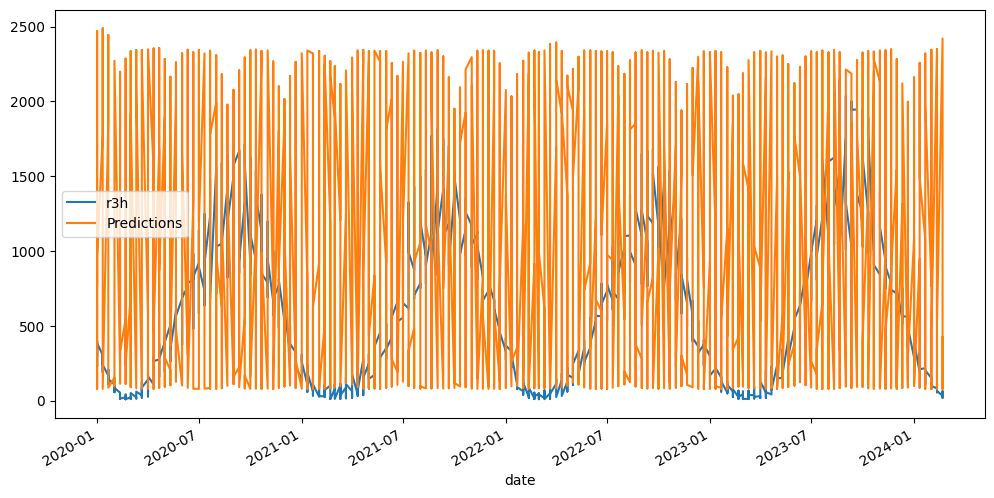

In [43]:
# code to plot test

test[['r3h','Predictions']].plot(figsize=(12, 6))


1/1 [==============================] - 0s 18ms/step


<Axes: >

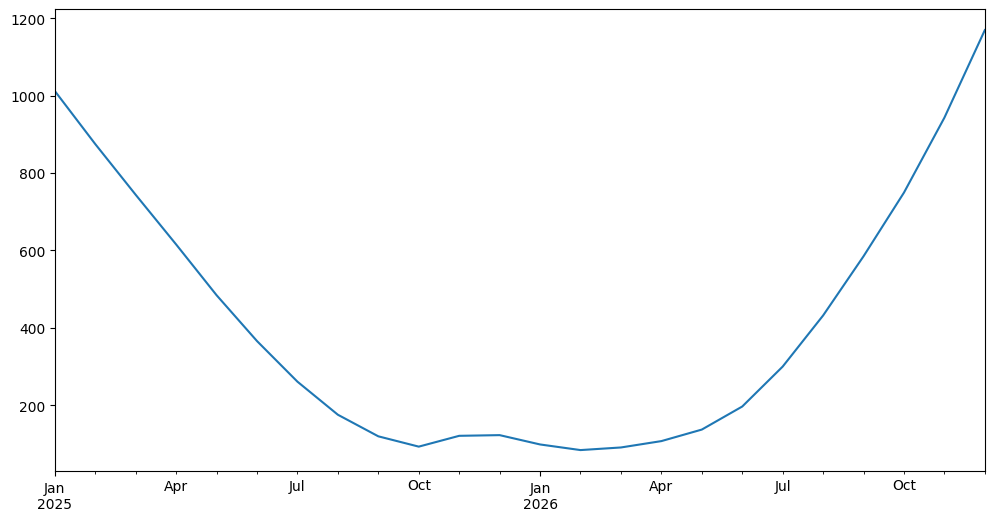

In [45]:
# prompt: based on the model prediction generate a code to plot a future prediction from 2025 to 2026

# Create a new dataframe for future predictions
future_dates = pd.date_range(start='2025-01-01', end='2026-12-31', freq='MS')
future_df = pd.DataFrame(index=future_dates)

# Use the last 12 months of the original data as the initial input for future predictions
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

# Make future predictions
future_predictions = []
current_batch = last_train_batch

for _ in range(24):
    # Get the prediction value for the current batch
    current_pred = model.predict(current_batch)[0]

    # Append the prediction to the list of future predictions
    future_predictions.append(current_pred)

    # Update the current batch with the predicted value and remove the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(future_predictions)

# Add the future predictions to the future dataframe
future_df['Predictions'] = future_predictions

# Plot the future predictions
future_df['Predictions'].plot(figsize=(12, 6))


In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['r3h'],test['r3h']))
print(rmse)

0.0


In [46]:
# prompt: generate a code to print the root mean square error

rmse = sqrt(mean_squared_error(test['r3h'], test['Predictions']))
print(rmse)


1026.738156859806


<ipython-input-47-40a368a6b094>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = test['r3h'] - test['Predictions']


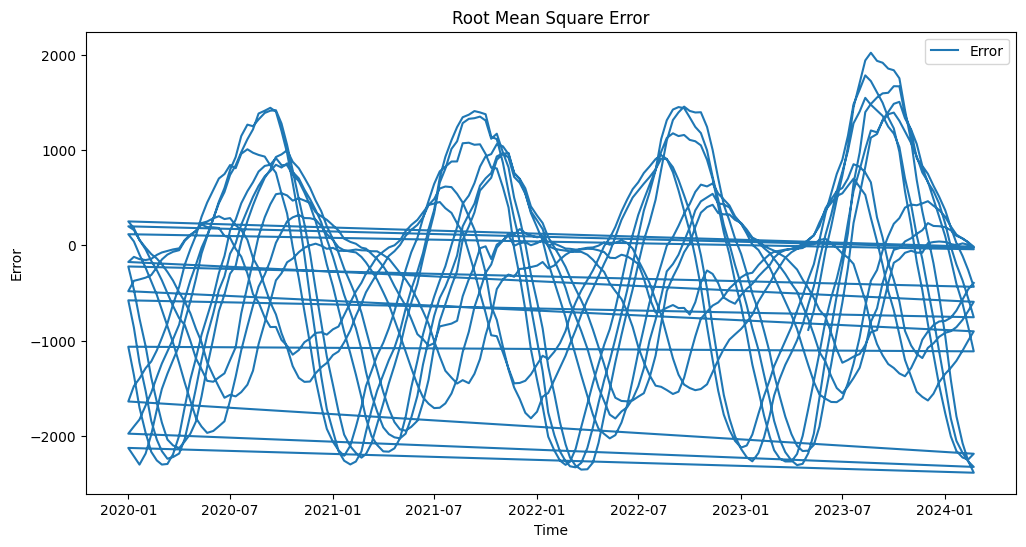

In [47]:
# prompt: plot the root mean square error

test['error'] = test['r3h'] - test['Predictions']
plt.figure(figsize=(12, 6))
plt.plot(test['error'], label='Error')
plt.title('Root Mean Square Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()


In [50]:
print(test.index.shape)
print(mse.shape)

(1680,)
()


ValueError: x and y must have same first dimension, but have shapes (1680,) and (1,)

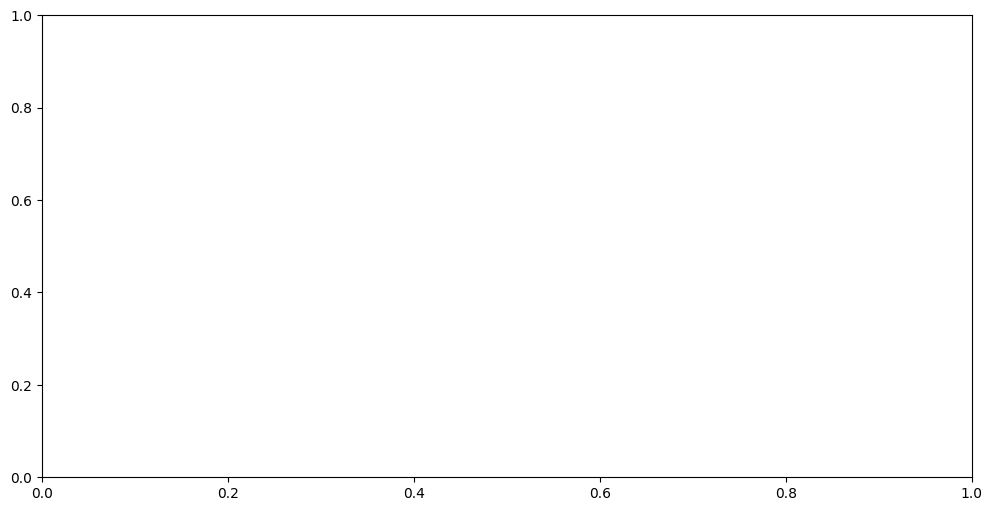

In [51]:
# Calculate the mean squared error
mse = mean_squared_error(test['r3h'], test['Predictions'])

# Create a list of time values
time_values = range(len(test))

# Plot the MSE error
plt.figure(figsize=(12, 6))
plt.plot(time_values, mse, label='MSE')
plt.title('Mean Squared Error')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.legend()
plt.show()
